# Smart San Antonio

## Weather Data

In [1]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Geospatial Library
import folium
import src

plt.style.use('tableau-colorblind10')

## Acquire

In [2]:
df = src.get_zone_data(sensor='weather', zone='all')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262449 entries, 0 to 262448
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DateTime        262449 non-null  object 
 1   Sensor_id       262449 non-null  object 
 2   Vendor          262449 non-null  object 
 3   SensorModel     262449 non-null  object 
 4   LAT             262449 non-null  float64
 5   LONG            262449 non-null  float64
 6   Zone            262449 non-null  object 
 7   Temp_C          262449 non-null  int64  
 8   Temp_F          262449 non-null  float64
 9   Humidity        262449 non-null  float64
 10  DewPoint_C      262449 non-null  float64
 11  DewPoint_F      262449 non-null  float64
 12  Pressure_Pa     262449 non-null  int64  
 13  AlertTriggered  0 non-null       float64
 14  SensorStatus    262449 non-null  object 
dtypes: float64(7), int64(2), object(6)
memory usage: 30.0+ MB


In [4]:
df.head(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered,SensorStatus
0,2021-04-20T00:04:46,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,18,64.0,45.0,5.880283,42.584509,992,NaN,Normal
1,2021-04-20T00:14:47,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,18,64.0,45.0,5.880283,42.584509,992,NaN,Normal
2,2021-04-20T00:24:47,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,18,64.0,45.0,5.880283,42.584509,992,NaN,Normal


In [5]:
df.tail(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered,SensorStatus
262446,2021-06-18T23:45:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,28,82.33,59.01,-999.0,-999.0,-999,NaN,Normal
262447,2021-06-18T23:50:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,28,82.33,59.01,-999.0,-999.0,-999,NaN,Normal
262448,2021-06-18T23:55:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,28,82.33,59.01,-999.0,-999.0,-999,NaN,Normal


In [6]:
df.isna().sum()

DateTime               0
Sensor_id              0
Vendor                 0
SensorModel            0
LAT                    0
LONG                   0
Zone                   0
Temp_C                 0
Temp_F                 0
Humidity               0
DewPoint_C             0
DewPoint_F             0
Pressure_Pa            0
AlertTriggered    262449
SensorStatus           0
dtype: int64

In [7]:
df.nunique()

DateTime          58549
Sensor_id            12
Vendor                2
SensorModel           2
LAT                  18
LONG                 19
Zone                  3
Temp_C               48
Temp_F             1344
Humidity           1882
DewPoint_C         1822
DewPoint_F         1825
Pressure_Pa          53
AlertTriggered        0
SensorStatus          1
dtype: int64

In [8]:
df.describe()

,LAT,LONG,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered
count,262449.000000,262449.000000,262449.000000,262449.000000,262449.000000,262449.000000,262449.000000,262449.000000,0.0
mean,29.411539,-98.491033,24.104264,75.369339,64.669271,-221.667693,-185.492364,616.741214,NaN
std,0.067520,0.060362,9.515444,17.119633,26.646491,432.765909,452.966998,752.189760,NaN
min,29.344120,-98.583500,-313.000000,-532.000000,0.000000,-999.000000,-999.000000,-999.000000,NaN
25%,29.344730,-98.580288,21.000000,70.000000,49.000000,2.638412,36.749141,972.000000,NaN
50%,29.415080,-98.481720,25.000000,76.440000,72.000000,19.095950,66.372710,982.000000,NaN
75%,29.504840,-98.435672,29.000000,85.000000,87.000000,21.700338,71.060609,989.000000,NaN
max,29.510070,-98.434544,194.000000,381.000000,146.000000,176.094879,348.970782,33751.000000,NaN


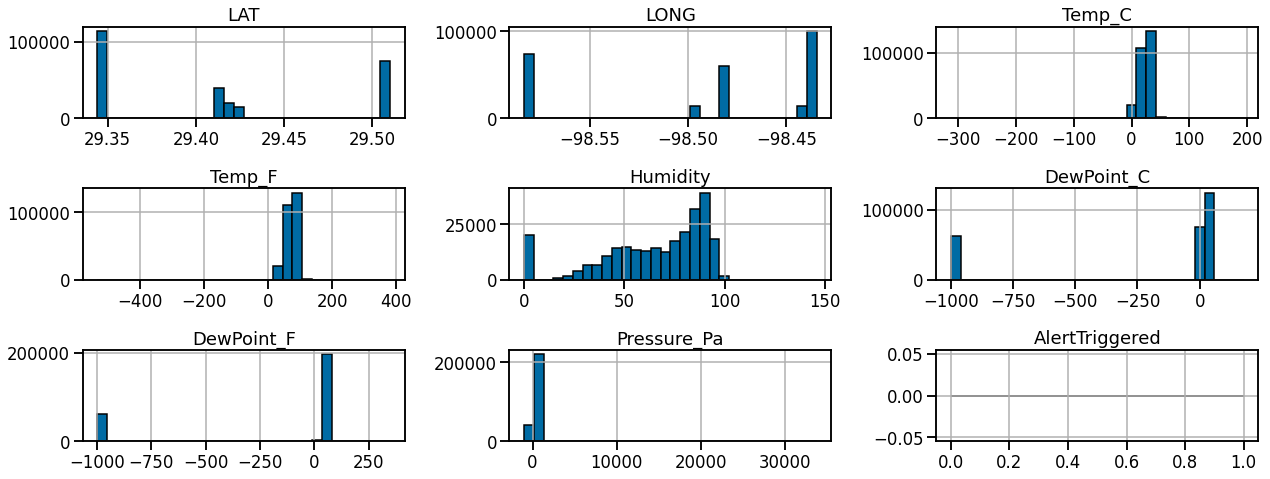

In [9]:
sns.set_context('talk')
plt.style.use('tableau-colorblind10')

df.hist(figsize=(18, 7), bins=30, ec='black')
plt.tight_layout();

## Prepare

- Format column names
- Replace column names with descriptive names
- Cast the date strings as datetime.
- Replace missing values in the `alert_triggered` column with "Not Supported".
    - Refer to the data dictionary.
- Replace "Downtown Market XX" zone with "Downtown"

In [10]:
df = src.prep_data(data=df, filename='weather')

## Explore

In [11]:
df.head(2)

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,temp_f,humidity,dewpoint_f,pressure_pa,alert_triggered,sensor_status
0,2021-04-20 00:04:46,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,64.0,45.0,42.584509,992,NaN,Normal
1,2021-04-20 00:14:47,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,64.0,45.0,42.584509,992,NaN,Normal


## How many flood level sensors were placed in each zone for the pilot program?

In [12]:
df.groupby('zone').sensor_id.nunique()

zone
Brooks            4
Downtown          4
Medical Center    4
Name: sensor_id, dtype: int64

## Where are the Noise Sensors located?

In [13]:
geo_cols = ['zone', 'sensor_id', 'latitude', 'longitude']
df_sensors = df.groupby(geo_cols).size().reset_index().rename(columns={0:'count'})

df_sensors

,zone,sensor_id,latitude,longitude,count
0,Brooks,63d684c940ce1f6b,29.34566,-98.434544,33384
1,Brooks,689324d0f345350d,29.34473,-98.435672,33379
2,Brooks,6de2cc6034fd26e8,29.34412,-98.436440,33386
3,Brooks,70449,29.34602,-98.439550,13824
4,Downtown,63db58629a2d20a7,29.41661,-98.484080,20054
5,Downtown,64d7e0e4cfeba0b6,29.41491,-98.481400,20044
6,Downtown,64d7e4dbde37ccb5,29.41591,-98.482880,20045
7,Downtown,70456,29.42457,-98.494570,14112
8,Medical Center,63e0b0eae3495a39,29.51007,-98.580288,20026
9,Medical Center,6dee283d397b9803,29.50752,-98.581368,20034


In [14]:
m = folium.Map(location=[29.4363, -98.4881],
               zoom_start=10,
               max_bounds=True,
               zoom_control=False)

# Plot the coordinates for each noise sensor.

zone_colors = ['orange', 'red', 'purple']
zones = ['Brooks', 'Downtown', 'Medical Center']

for z, zc in zip(zones, zone_colors):
    data = df_sensors[df_sensors.zone == z]

    for _, row in data.iterrows():
        m.add_child(
            folium.Marker(location=[str(row['latitude']), str(row['longitude'])],
                          tooltip=row['zone'],
                          prefer_canvas=True,
                          disable_3d=True,
                          icon=folium.Icon(icon='cloud',
                                           color=zc,
                                           prefix='fa')
                         )
                    )

In [15]:
m

## What is the highest humidity recorded in each zone? 

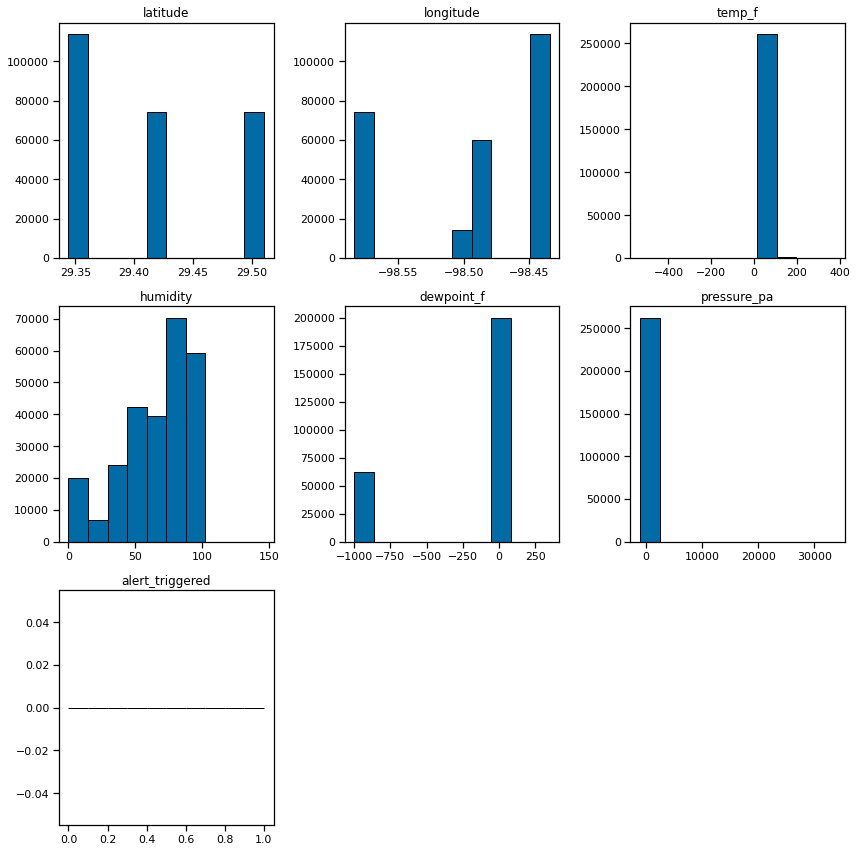

In [16]:
sns.set_context('notebook')

df.hist(figsize=(12, 12),
        grid=False,
        ec='black')
plt.tight_layout();

In [17]:
df_humidity_stats = df.groupby('zone').humidity.describe(percentiles=[.00125, .25, .75, .997]).reset_index()

df_humidity_stats

,zone,count,mean,std,min,0.1%,25%,50%,75%,99.7%,max
0,Brooks,113973.0,69.389675,20.964840,15.0,16.0,52.0,75.00,88.0,99.0,100.0
1,Downtown,74255.0,51.077715,34.983174,0.0,0.0,0.0,60.28,83.0,97.0,146.0
2,Medical Center,74221.0,71.018451,18.763827,14.0,19.0,56.0,76.00,87.0,98.0,121.0


In [18]:
q3 = np.percentile(df['humidity'], 75)
q1 = np.percentile(df['humidity'], 25)
iqr = (q3 - q1)

upper_bound = (iqr * 3) + q3
outliers = df.loc[df.humidity > upper_bound].sort_values('date').reset_index(drop=True)

In [19]:
outliers

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,temp_f,humidity,dewpoint_f,pressure_pa,alert_triggered,sensor_status


## What is the humidity throughout the day for each zone?

In [20]:
humidity = df.groupby(['date', 'zone']).humidity.agg(['mean']).sort_values(by=['zone', 'date']).reset_index()

In [21]:
humidity.set_index(pd.DatetimeIndex(humidity['date']), inplace=True)

In [22]:
humidity

,date,zone,mean
date,,,
2021-04-20 00:00:06,2021-04-20 00:00:06,Brooks,50.333333
2021-04-20 00:01:47,2021-04-20 00:01:47,Brooks,50.333333
2021-04-20 00:03:06,2021-04-20 00:03:06,Brooks,50.333333
2021-04-20 00:04:18,2021-04-20 00:04:18,Brooks,72.000000
2021-04-20 00:04:21,2021-04-20 00:04:21,Brooks,71.000000
...,...,...,...
2021-06-18 23:50:00,2021-06-18 23:50:00,Medical Center,59.010000
2021-06-18 23:52:55,2021-06-18 23:52:55,Medical Center,54.333333
2021-06-18 23:55:00,2021-06-18 23:55:00,Medical Center,59.010000


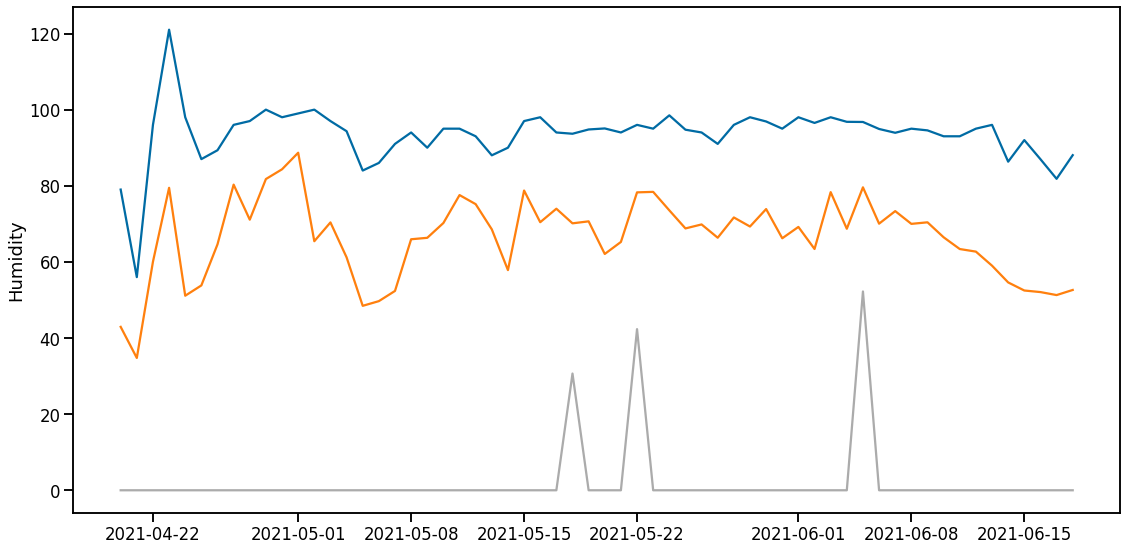

In [23]:
sns.set_context('talk')

plt.figure(figsize=(16, 8))
plt.plot(humidity.resample('D').agg(['max', 'mean', 'min']))

plt.xlabel('')
plt.ylabel('Humidity')
plt.tight_layout();

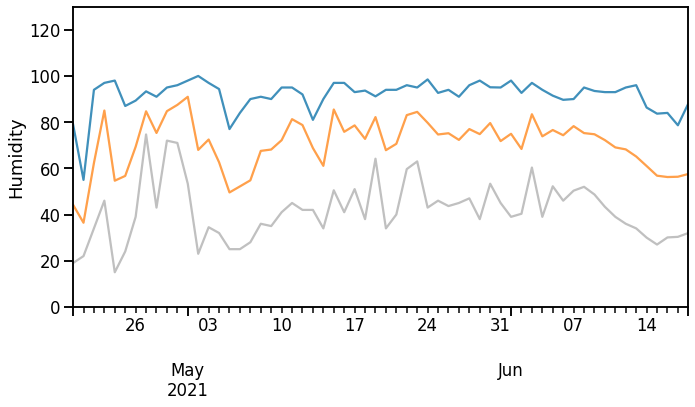

In [24]:
humidity[humidity.zone=='Brooks'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Humidity')

plt.ylim(0, 130)
plt.tight_layout();

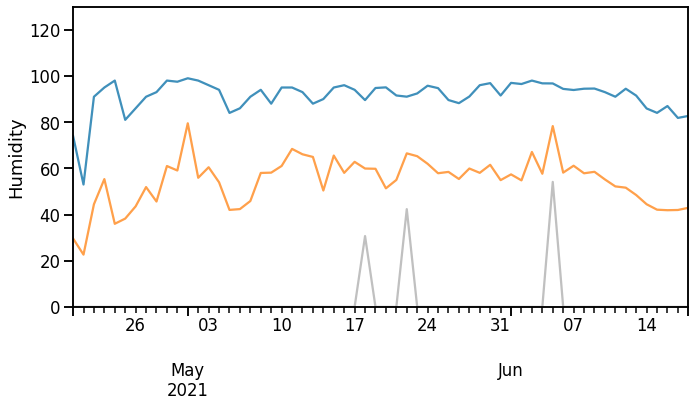

In [25]:
humidity[humidity.zone=='Downtown'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Humidity')

plt.ylim(0, 130)
plt.tight_layout();

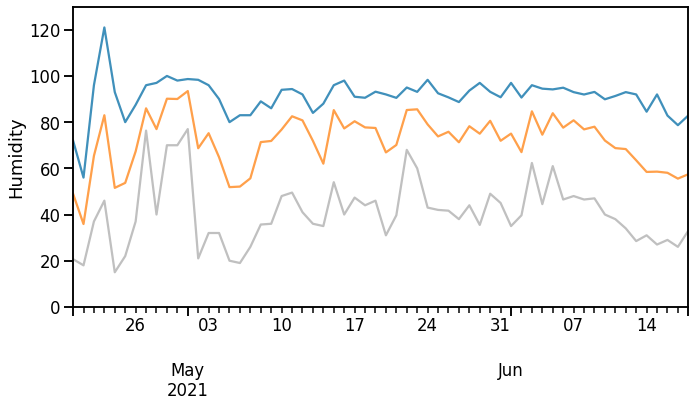

In [26]:
humidity[humidity.zone == 'Medical Center'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Humidity')

plt.ylim(0, 130)
plt.tight_layout();

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

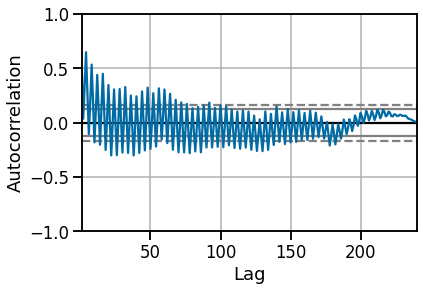

In [27]:
pd.plotting.autocorrelation_plot(humidity[humidity.zone=='Downtown'].resample('6H').mean())

In [28]:
top_dates = humidity.resample('D').mean().sort_values(by=['mean'],ascending=False).head(3)
vals = []
for tgl, tot in zip(top_dates.index, top_dates["mean"]):
    tgl = tgl.strftime("%d %B")
    val = "%d (%s)"%(tot, tgl)
    vals.append(val)
top_dates['tgl'] = vals
top_dates

,mean,tgl
date,,
2021-05-01,88.678696,88 (01 May)
2021-04-30,84.330811,84 (30 April)
2021-04-29,81.765139,81 (29 April)


In [29]:
fig = go.Figure(data=go.Scatter(x=humidity.resample('D').mean().index.astype(dtype=str), 
                                y=humidity.resample('D').mean()['mean'],
                                text="counts"))

fig.update_layout({"title": 'Humidity in all zones',
                   "yaxis": {"title": r"Humidity"},
                   "showlegend": False})

fig.add_traces(go.Scatter(x=top_dates.index, y=top_dates['mean'],
                          textposition='top center',
                          textfont=dict(color='#233a77'),
                          mode='markers+text',
                          marker=dict(color='red', size=8),
                          text = top_dates["tgl"]))

fig.update_traces(textfont_size=12)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
xaxis_range=['2021-04-15','2021-06-01'],
yaxis_range=[0, 100])

fig.show()

### Hypothesis Tests

## Conclusions 